In [5]:
from skimage.io import imread
from torchange.models.segment_any_change import AnyChange, show_change_masks
import os
import matplotlib.pyplot as plt

DATA_PATH = "./Multi_change/data/LEVIR-MCI-dataset/images"

In [ ]:
imgA = imread(os.path.join(DATA_PATH, 'test/A/test_000031.png'))
imgB = imread(os.path.join(DATA_PATH, 'test/B/test_000031.png'))

# initialize AnyChange  
m = AnyChange('vit_h', sam_checkpoint='./Multi_change/models_ckpt/sam_vit_h_4b8939.pth')
# customize the hyperparameters of SAM's mask generator
m.make_mask_generator(
    points_per_side=32,
    stability_score_thresh=0.95,
)
# customize your AnyChange's hyperparameters
m.set_hyperparameters(
    change_confidence_threshold=155,
    use_normalized_feature=True,
    bitemporal_match=True,
    object_sim_thresh=60,
)

changemasks, _, _ = m.forward(imgA, imgB) # automatic mode

fig, axes = show_change_masks(imgA, imgB, changemasks)

plt.show()

Keys in mask_data: dict_keys(['iou_preds', 'points', 'stability_score', 'boxes', 'rles', 'crop_boxes', 'areas', 'change_confidence'])


AttributeError: 'MaskData' object has no attribute 'get'

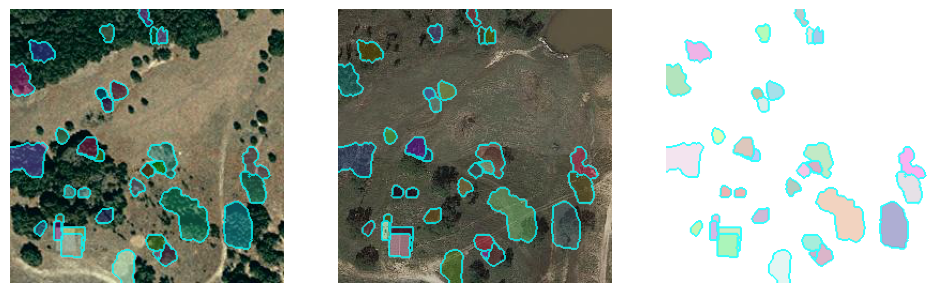

In [7]:
changemasks = m.single_point_match(xy=[58, 220], temporal=2, img1=imgA, img2=imgB)
fig, axes = show_change_masks(imgA, imgB, changemasks)

plt.show()